Reg Log

In [2]:
# Importamos las librerías que vamos a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Importo los datos
Datos = pd.read_csv('Iris_Binaria.csv')

# Uso solo dos variables para poder graficar claramente el borde de decisión
Datos = Datos[["SepalLengthCm","SepalWidthCm","Species"]]

Datos.head(10)

,SepalLengthCm,SepalWidthCm,Species
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa
5,5.4,3.9,Iris-setosa
6,4.6,3.4,Iris-setosa
7,5.0,3.4,Iris-setosa
8,4.4,2.9,Iris-setosa
9,4.9,3.1,Iris-setosa


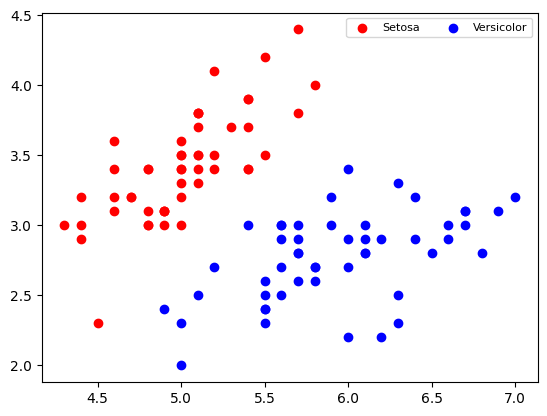

In [3]:
# Visualizo los datos
Setosa =plt.scatter(Datos[Datos["Species"]=='Iris-setosa']["SepalLengthCm"], Datos[Datos["Species"]=='Iris-setosa']["SepalWidthCm"],c="red")
Versicolor =plt.scatter(Datos[Datos["Species"]=='Iris-versicolor']["SepalLengthCm"], Datos[Datos["Species"]=='Iris-versicolor']["SepalWidthCm"],c="blue")
plt.legend((Setosa,Versicolor),
           ('Setosa','Versicolor'),
           scatterpoints=1,
           
           ncol=3,
           fontsize=8)
plt.show()

In [4]:
# Covierto los datos a X e Y
X = Datos[["SepalLengthCm","SepalWidthCm"]]
y = Datos["Species"]

y = [1 if i == 'Iris-setosa' else 0 for i in y]

# Separo en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Corro la regresión logística
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

# Miro los coeficientes que se obtuvieron
print(clf.coef_)
# Miro el intercept
print(clf.intercept_)

[[-2.81948589  2.65496226]]
[7.00207306]


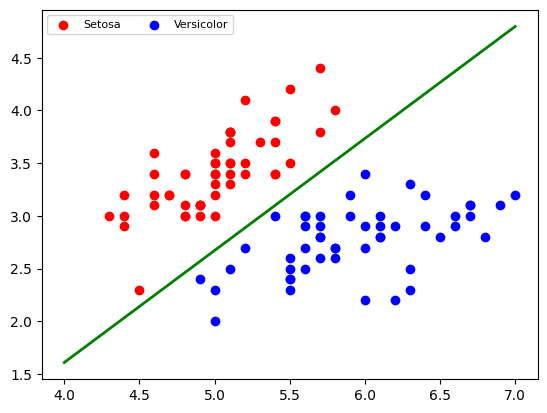

In [5]:
# Visualizo el borde de decisión
Setosa =plt.scatter(Datos[Datos["Species"]=='Iris-setosa']["SepalLengthCm"], Datos[Datos["Species"]=='Iris-setosa']["SepalWidthCm"],c="red")
Versicolor =plt.scatter(Datos[Datos["Species"]=='Iris-versicolor']["SepalLengthCm"], Datos[Datos["Species"]=='Iris-versicolor']["SepalWidthCm"],c="blue")
plt.legend((Setosa,Versicolor),
           ('Setosa','Versicolor'),
           scatterpoints=1,
           ncol=3,
           fontsize=8)
Borde = plt.plot([i for i in range(4,8)],[(i*clf.coef_[0][0] + clf.intercept_[0])/(-1*clf.coef_[0][1]) for i in range(4,8)] , linewidth=2, color="Green")
plt.show()

In [6]:
# Uso el accuracy en test y en train para ver como funciona el modelo
pred_train = clf.predict_proba(X_train)
pred_test = clf.predict_proba(X_test)

# Train
cont = 0
for i in range(len(pred_train)):
    if (pred_train[i][1]>0.5 and y_train[i]==1) or (pred_train[i][1]<=0.5 and y_train[i]==0):
        cont += 1
print("Accuracy en train = {}".format(round(cont/len(pred_train),3)))

# Test
cont = 0
for i in range(len(pred_test)):
    if (pred_test[i][1]>0.5 and y_test[i]==1) or (pred_test[i][1]<=0.5 and y_test[i]==0):
        cont += 1
print("Accuracy en test = {}".format(round(cont/len(pred_test),3)))



Accuracy en train = 1.0
Accuracy en test = 1.0


Reg Softmax regresion logistica multinomial


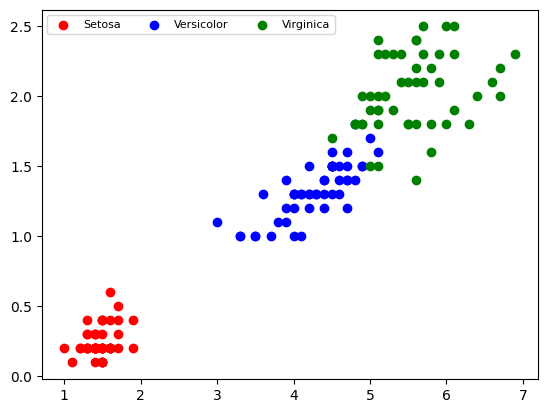

In [8]:
# Importo los datos
Datos = pd.read_csv('Iris.csv')

# Uso solo dos variables para poder graficar claramente el borde de decisión
Datos = Datos[["PetalLengthCm","PetalWidthCm","Species"]]

# Visualizo los datos
Setosa =plt.scatter(Datos[Datos["Species"]=='Iris-setosa']["PetalLengthCm"], Datos[Datos["Species"]=='Iris-setosa']["PetalWidthCm"],c="red")
Versicolor =plt.scatter(Datos[Datos["Species"]=='Iris-versicolor']["PetalLengthCm"], Datos[Datos["Species"]=='Iris-versicolor']["PetalWidthCm"],c="blue")
Virginica =plt.scatter(Datos[Datos["Species"]=='Iris-virginica']["PetalLengthCm"], Datos[Datos["Species"]=='Iris-virginica']["PetalWidthCm"],c="green")
plt.legend((Setosa,Versicolor,Virginica),
           ('Setosa','Versicolor','Virginica'),
           scatterpoints=1,
           ncol=3,
           fontsize=8)
plt.show()

In [9]:
X = Datos[["PetalLengthCm","PetalWidthCm"]]
y = Datos["Species"]

# Separo en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Corro la regresión logística
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

# Miro los coeficientes que se obtuvieron
print(clf.coef_)
# Miro el intercept
print(clf.intercept_)

[[-2.54351176 -1.07400278]
 [ 0.0717029  -0.71016455]
 [ 2.47180886  1.78416732]]
[ 10.14908213   2.84305981 -12.99214194]


In [10]:
# Calculo el accuracy en train y test
print(clf.score(X_train,y_train))

print(clf.score(X_test,y_test))

0.9553571428571429
1.0


c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


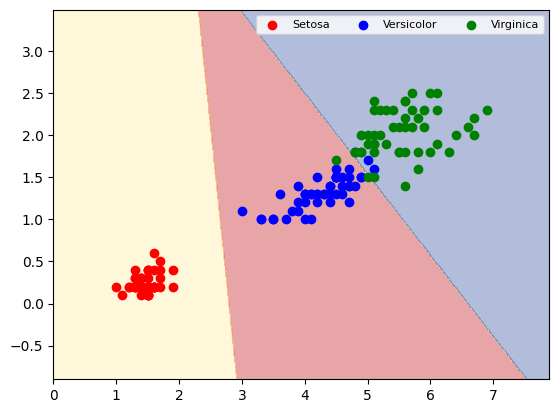

In [11]:
# Visualizo la clasificación
# Creo una malla de puntos para graficar los bordes de decisión
x_min, x_max = X["PetalLengthCm"].min() - 1, X["PetalLengthCm"].max() + 1
y_min, y_max = X["PetalWidthCm"].min() - 1, X["PetalWidthCm"].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
# Predecir en toda la malla de puntos
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array([1 if i == 'Iris-setosa' else 2 if i == 'Iris-virginica' else 0 for i in Z])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
Setosa =plt.scatter(Datos[Datos["Species"]=='Iris-setosa']["PetalLengthCm"], Datos[Datos["Species"]=='Iris-setosa']["PetalWidthCm"],c="red")
Versicolor =plt.scatter(Datos[Datos["Species"]=='Iris-versicolor']["PetalLengthCm"], Datos[Datos["Species"]=='Iris-versicolor']["PetalWidthCm"],c="blue")
Virginica =plt.scatter(Datos[Datos["Species"]=='Iris-virginica']["PetalLengthCm"], Datos[Datos["Species"]=='Iris-virginica']["PetalWidthCm"],c="green")
plt.legend((Setosa,Versicolor,Virginica),
           ('Setosa','Versicolor','Virginica'),
           scatterpoints=1,
           ncol=3,
           fontsize=8)
plt.show()

One vs rest

C:\Users\marqu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\marqu\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


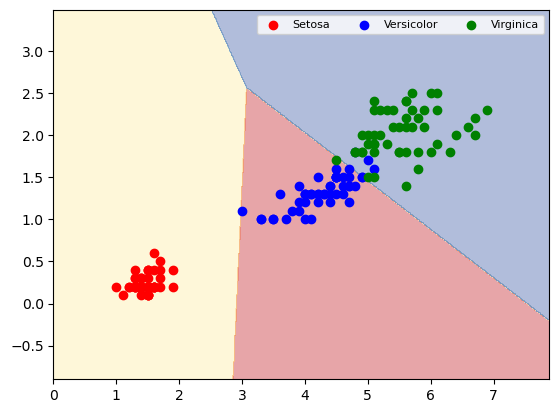

In [21]:
X = Datos[["PetalLengthCm","PetalWidthCm"]]
y = Datos["Species"]
# Separo en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Corro la regresión logística
clf = LogisticRegression(multi_class='ovr',random_state=0).fit(X_train, y_train)
x_min, x_max = X["PetalLengthCm"].min() - 1, X["PetalLengthCm"].max() + 1
y_min, y_max = X["PetalWidthCm"].min() - 1, X["PetalWidthCm"].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array([1 if i == 'Iris-setosa' else 2 if i == 'Iris-virginica' else 0 for i in Z])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
Setosa =plt.scatter(Datos[Datos["Species"]=='Iris-setosa']["PetalLengthCm"], Datos[Datos["Species"]=='Iris-setosa']["PetalWidthCm"],c="red")
Versicolor =plt.scatter(Datos[Datos["Species"]=='Iris-versicolor']["PetalLengthCm"], Datos[Datos["Species"]=='Iris-versicolor']["PetalWidthCm"],c="blue")
Virginica =plt.scatter(Datos[Datos["Species"]=='Iris-virginica']["PetalLengthCm"], Datos[Datos["Species"]=='Iris-virginica']["PetalWidthCm"],c="green")
plt.legend((Setosa,Versicolor,Virginica),
           ('Setosa','Versicolor','Virginica'),
           scatterpoints=1,
           ncol=3,
           fontsize=8)
plt.show()

In [12]:
# Calculo el accuracy en train y test
print(clf.score(X_train,y_train))

print(clf.score(X_test,y_test))

0.9553571428571429
1.0


KNN

c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


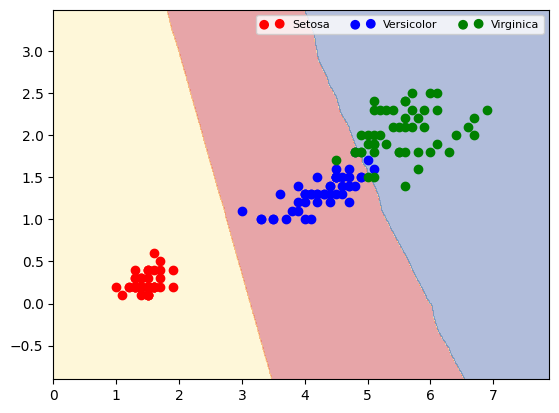

c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


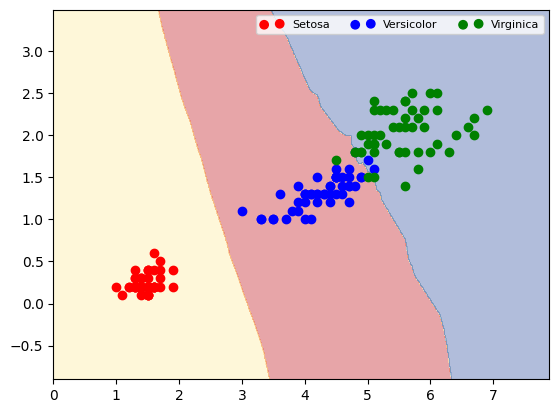

c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


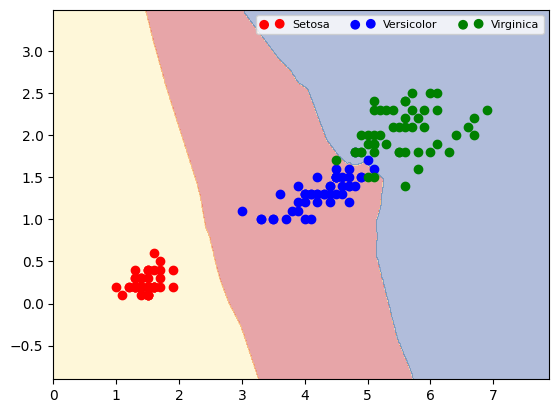

c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


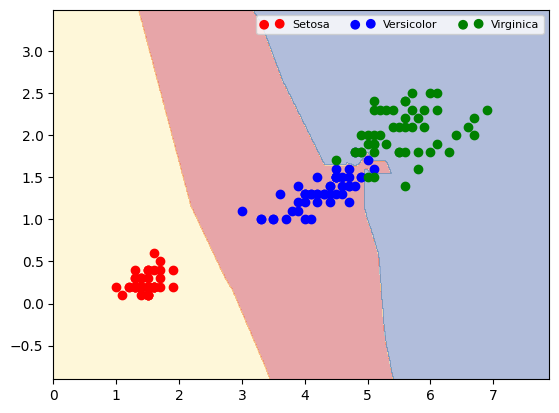

In [13]:
from sklearn.neighbors import KNeighborsClassifier
# Corro el algoritmo KNN con distintos k
for k in [40,20,5,1]:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    x_min, x_max = X["PetalLengthCm"].min() - 1, X["PetalLengthCm"].max() + 1
    y_min, y_max = X["PetalWidthCm"].min() - 1, X["PetalWidthCm"].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array([1 if i == 'Iris-setosa' else 2 if i == 'Iris-virginica' else 0 for i in Z])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    Setosa =plt.scatter(Datos[Datos["Species"]=='Iris-setosa']["PetalLengthCm"], Datos[Datos["Species"]=='Iris-setosa']["PetalWidthCm"],c="red")
    Versicolor =plt.scatter(Datos[Datos["Species"]=='Iris-versicolor']["PetalLengthCm"], Datos[Datos["Species"]=='Iris-versicolor']["PetalWidthCm"],c="blue")
    Virginica =plt.scatter(Datos[Datos["Species"]=='Iris-virginica']["PetalLengthCm"], Datos[Datos["Species"]=='Iris-virginica']["PetalWidthCm"],c="green")
    plt.legend((Setosa,Versicolor,Virginica),
            ('Setosa','Versicolor','Virginica'),
            scatterpoints=2,
            ncol=3,
            fontsize=8)
    plt.show()

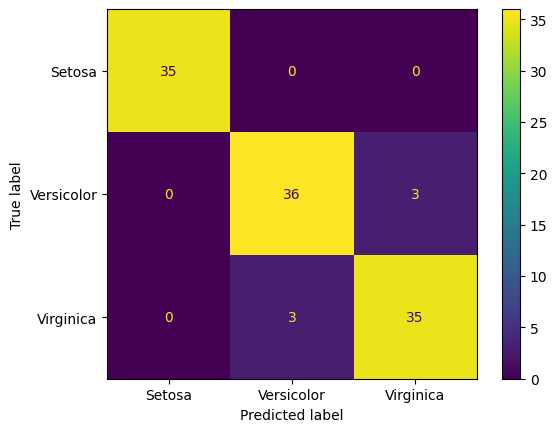

In [14]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
cm=confusion_matrix(y_train,knn.predict(X_train))

cm_display =ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Setosa','Versicolor','Virginica'])
cm_display.plot()
plt.show()

In [15]:
from sklearn.metrics import precision_score,recall_score,f1_score
print("Precision = {}".format(precision_score(y_train,knn.predict(X_train),average='micro')))
print("Recall = {}".format(recall_score(y_train,knn.predict(X_train),average='micro')))
print("F1_Score = {}".format(f1_score(y_train,knn.predict(X_train),average='micro')))

Precision = 0.9464285714285714
Recall = 0.9464285714285714
F1_Score = 0.9464285714285714


In [16]:
from sklearn.metrics import roc_auc_score
print("AUC ROC = {}".format(roc_auc_score(y_train,knn.predict_proba(X_train),multi_class = 'ovr')))

AUC ROC = 0.996701293384783


Redes neuronales ejemplo

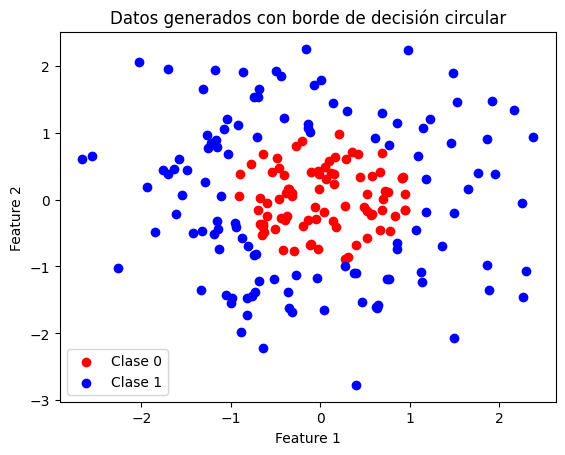

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos
def generate_data(num_samples=200):
    np.random.seed(0)
    x = np.random.randn(num_samples, 2)
    y = np.zeros(num_samples)
    radius = np.linalg.norm(x, axis=1)
    y[radius > 1] = 1
    return x, y

X, y = generate_data()
   
# Visualizar los datos
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Clase 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Clase 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Datos generados con borde de decisión circular')
plt.legend()
plt.show()

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definir el modelo
model = Sequential()
model.add(Dense(100, input_dim=2, activation='relu'))  # Capa oculta
model.add(Dense(100, input_dim=2, activation='relu'))
model.add(Dense(100, input_dim=2, activation='relu'))
model.add(Dense(100, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Capa de salida

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X, y, epochs=100, batch_size=1000, validation_split=0.2)

# Evaluar el modelo
loss, accuracy = model.evaluate(X, y)
print(f'Pérdida: {loss}, Accuracy: {accuracy}')

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4313 - loss: 0.7064 - val_accuracy: 0.6500 - val_loss: 0.6852
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.5750 - loss: 0.6864 - val_accuracy: 0.6250 - val_loss: 0.6660
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.5688 - loss: 0.6695 - val_accuracy: 0.6250 - val_loss: 0.6483
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.5688 - loss: 0.6549 - val_accuracy: 0.6250 - val_loss: 0.6331
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5688 - loss: 0.6420 - val_accuracy: 0.6250 - val_loss: 0.6192
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.5688 - loss: 0.6300 - val_accuracy: 0.6250 - val_loss: 0.6059
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.5688 - loss: 0.6189 - val_accuracy: 0.6250 - val_loss: 0.5934
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.5688 - loss: 0.6085 - val_accuracy: 0.6250 - val_loss

15488/15488 ━━━━━━━━━━━━━━━━━━━━ 8s 504us/step


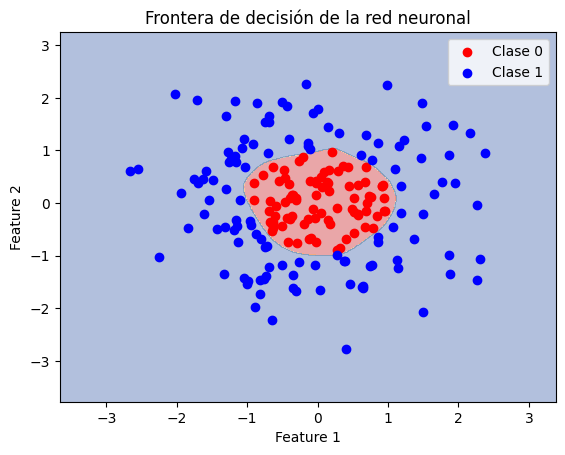

In [21]:
 # Crear una malla de puntos
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array([1 if i>=0.5 else 0 for i in Z.flatten()])
Z = Z.reshape(xx.shape)

# Visualizar la frontera de decisión
plt.contourf(xx, yy, Z,  alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Clase 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Clase 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Frontera de decisión de la red neuronal')
plt.legend()
plt.show()